In [1]:
from config import config
import pickle
import numpy as np 
import matplotlib.pyplot as plt
import skimage
%matplotlib inline
path_to_restrained_dataset = config['paths']['restricted_dataset_path']
def unpickle(file):
    with open(file, 'rb') as f:
        dict = pickle.load(f, encoding='bytes')
    return dict

In [2]:
dataset = unpickle(path_to_restrained_dataset)
data_train = np.array(dataset['data'])
data_labels = dataset['labels']
print("The shape of train data: ", data_train.shape)
n_images = data_train.shape[0]
n_channels =3
#length of width and height of each image
size_image = 32
pixels_per_image = size_image * size_image * n_channels
print("There will be %d pixels per image" % pixels_per_image, " of shape ({},{},{})".format(size_image, size_image, n_channels))



The shape of train data:  (5000, 3072)
There will be 3072 pixels per image  of shape (32,32,3)


In [3]:
#two ways of reshaping the data - important - convert to img as float, otherwise it shows funky colors
# def reshape_data(data, output_shape):
#     reshaped_array = []
#     data=skimage.img_as_float(data)
#     for instance in data:
#         instance_zeros = instance.reshape((3,1024)).T
#         reshaped_img = np.zeros(output_shape)
#         for row in range(output_shape[0]):
#             reshaped_img[row,:,0] = instance_zeros[row*output_shape[0]:(row+1)*output_shape[0],0]
#             reshaped_img[row,:,1] = instance_zeros[row*output_shape[0]:(row+1)*output_shape[0],1]
#             reshaped_img[row,:,2] = instance_zeros[row*output_shape[0]:(row+1)*output_shape[0],2]
#         reshaped_array.append(reshaped_img)
#     return np.array(reshaped_array)

def reshape_data(data, size_image, n_channels):
    data_float = skimage.img_as_float(data)
    rgb_images = np.zeros(data.shape[0]*size_image*size_image*n_channels)
    for i in range(n_channels):
        channel_values = data_float.T[i*size_image*size_image:(i+1)*size_image*size_image]
        rgb_images[i::n_channels] = channel_values.T.ravel()
    return rgb_images.reshape(data.shape[0], size_image, size_image, n_channels)

In [4]:
data_train = reshape_data(data_train, size_image, n_channels)

(15360000,)


In [6]:
import os
import random
print(np.unique(data_labels))
cifarpath = config['paths']['cifardatapath']
meta_batches = unpickle(os.path.join(cifarpath, 'batches.meta'))
class_names =[x.decode('utf-8') for x in meta_batches[b'label_names']] 

#mapping between int and string for recognition of labels
#labels in the train/test are stored as integers and in batches meta as strings

mapping_classnames = dict()
for i,value in enumerate(class_names):
    mapping_classnames[i] = value


random_images = {}
for i in list(np.unique(data_labels)):
    random.seed(i)
    indices_class = np.where(data_labels == i)[0]
    random.shuffle(indices_class)
    random_images[i] = data_train[indices_class[:10],:]
    

[0 1 2 3 4 5 6 7 8 9]


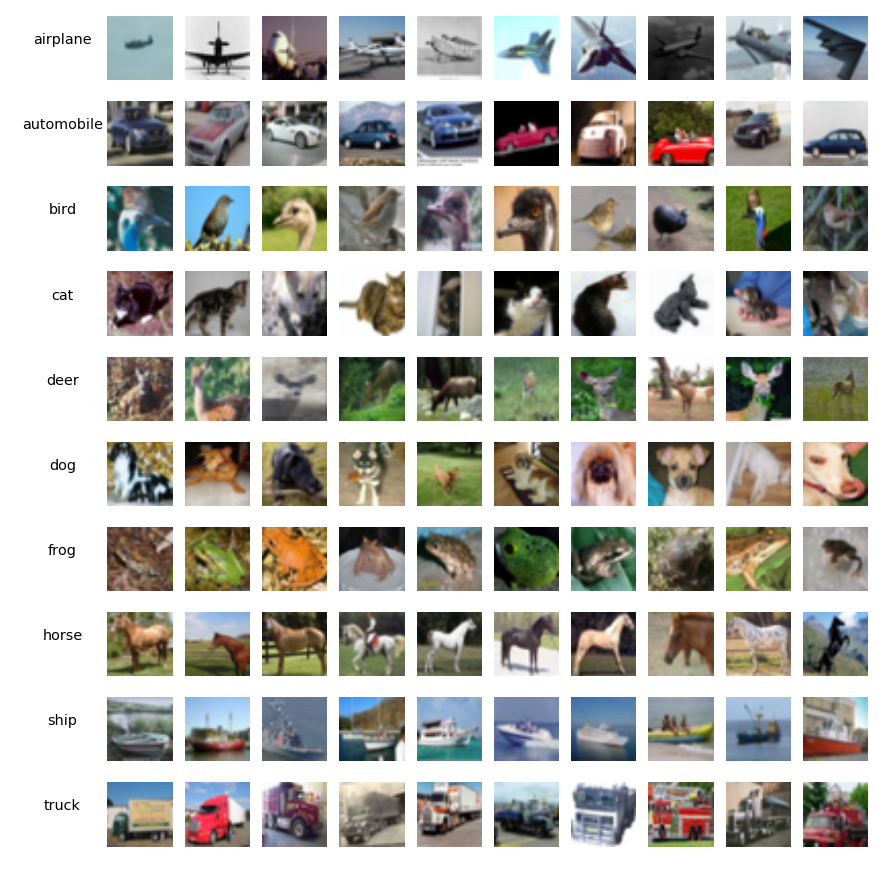

In [21]:
#plotting the 10 random images along with their categories
fig, axes = plt.subplots(nrows=len(mapping_classnames.keys()), ncols=len(mapping_classnames.keys())+1, squeeze=False, figsize=(15,15))

for i in mapping_classnames.keys():
    for j in range(len(random_images[i])):
        ax = axes[i, j+1]
        ax.axis('off')
        plt.sca(ax)
        plt.imshow(random_images[i][j])

    ax = axes[i, 0]
    plt.rcParams.update({'font.size': 12})
    ax.set_title(mapping_classnames[i], y=0.5)
    ax.axis('off')
    plt.sca(ax)

